In [1]:
import numpy as np
from numpy.typing import NDArray
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def extend_array(array: NDArray, size: np.uint64, filler: np.float64 = 0) -> NDArray:
    
    """
    array: NDArray          => Input Numpy array (One dimensional).
    size: np.uint64         => Size of the newly created array.
    filler: np.float64 = 0  => Value to fill the new elements.
    
    Takes in a one dimensional numpy array of numbers (ints and floats) and extends the array to the specified size.
    The returned array is a new array with the original elements at the front and fillers padded at the back.
    By default the filler is 0.
    If `size` is less than array.size an exception will be thrown!
    If `size` is equal to array.size the same input array will be returned!
    """
    
    assert isinstance(array, np.ndarray), "Only Numpy arrays are accepted for the `array` argument!"
    assert len(array.shape) == 1, "Only one dimensional Numpy arrays are accepted for the `array` argument!"
    
    if array.size > size:
        raise ValueError("array.size > size: Cannot accept sizes smaller than the size of passed array!")
    elif array.size == size:
        return array

    filler = np.full(size - array.size, fill_value = filler, dtype = array.dtype)
    return np.append(array, filler)

In [4]:
def fasta_to_numpy(fasta_file_path: str, enc: str = "ascii") -> NDArray:
    
    """
    fasta_file_path: str => Path to the .fasta or .fa file containing the DNA sequence.
    enc: str = "ascii"   => Encoding used in the .fasta file.

    Reads in the FASTA file specified by `fasta_file_path` and truns it into a Numpy one
    dimensional array of characters (nucleotides).
    A FileNotFoundError will be raised if the file specified by `fasta_file_path` does not exist on the system.
    """

    if not os.path.exists(fasta_file_path):
        raise FileNotFoundError(f"{fasta_file_path} is not found in the system!") 

    with open(fasta_file_path, "r", encoding = enc) as fp:
        contents = str(fp.read())
    
    # get rid of the first line >ACCESSION SOME KUMBAYA.
    # and cleanup newline characters if present.
    content = "".join(contents.splitlines()[1:]).replace('\n', '')

    return np.array(list(content))

In [5]:
np.unique(fasta_to_numpy("./data/seqs/Kin2021.fasta"))

array(['A', 'C', 'G', 'T'], dtype='<U1')

In [42]:
seqs = []

for f in os.listdir("./data/refseqs/edited/"):
        with open("./data/refseqs/edited/"+ f, "r") as file:
            seqs.append(str(file.read()))
            

In [103]:
cleaned_seqs = []
temp = ""

for seq in seqs:
    __tmp = seq.splitlines()[1:]      # skip the first >... line
    for line in __tmp:
        temp += line
    cleaned_seqs.append(pd.Series(list(temp)))
    temp = ""

In [104]:
seqsizes = [seq.size for seq in cleaned_seqs]
seqsizes

[2770,
 2779,
 2769,
 2802,
 2797,
 2804,
 2801,
 2798,
 2798,
 2799,
 2785,
 2815,
 2735,
 2743,
 2719,
 2800,
 2758,
 2755]

In [105]:
sizemax = np.max(seqsizes)
sizemax

2815

In [106]:
abbrs = [fname.replace(".fasta", "") for fname in os.listdir("./data/refseqs/edited/")]
abbrs

['ACMBFV',
 'ACMV',
 'CMMGV',
 'EACMCMV',
 'EACMKV',
 'EACMMV',
 'EACMV-KE',
 'EACMV-MW',
 'EACMV-TZ',
 'EACMV-UG',
 'EACMZV',
 'ICMV-IN',
 'ICMV-Jat',
 'ICMV-Ker',
 'ICMV',
 'SACMV',
 'SLCMV-IN',
 'SLCMV-LK']

In [113]:
seq_series = []

for seq in cleaned_seqs:
    if seq.size != sizemax:
        seq_series.append(pd.concat([seq, pd.Series(['Z'] * (sizemax - seq.size))], ignore_index = True))
    else:
        seq_series.append(seq)

In [114]:
[seq.size for seq in seq_series]

[2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815,
 2815]

In [115]:
df = {abbr : seq for (abbr, seq) in zip(abbrs, seq_series)}

In [116]:
seqframe = pd.DataFrame.from_dict(df)

In [117]:
seqframe.shape

(2815, 18)

In [118]:
seqframe.apply(lambda column: (column == 'Z').sum(), axis = 0)

ACMBFV      45
ACMV        36
CMMGV       46
EACMCMV     13
EACMKV      18
EACMMV      11
EACMV-KE    14
EACMV-MW    17
EACMV-TZ    17
EACMV-UG    16
EACMZV      30
ICMV-IN      0
ICMV-Jat    80
ICMV-Ker    72
ICMV        96
SACMV       15
SLCMV-IN    57
SLCMV-LK    60
dtype: int64

In [121]:
seqframe.ACMBFV.apply(ord)

0       65
1       67
2       67
3       71
4       71
        ..
2810    90
2811    90
2812    90
2813    90
2814    90
Name: ACMBFV, Length: 2815, dtype: int64

In [169]:
list(delim)

[0, 750, 1500, 2250]

In [ ]:
fig, axis = plt.subplots(nrows = 5)
fig.set_size_inches(100, 100)
delim = list(range(0, seqframe.shape[0], 750))

for (d, ax) in zip(delim, axis):
    ax.imshow(seqframe.iloc[:(d + 750), :].map(ord).T)

In [20]:
def seq_to_numeric(sequence: NDArray) -> NDArray[np.int64]:
    
    """
    
    """
        
    cmap : dict[str, int] = {
        'A': 0,
        'T': 20,
        'G': 40,
        'C': 60, 
        'Z': 100    # For fillers.
    }

    status: list[bool] = [ntide in cmap.keys() for ntide in np.unique(sequence)]
    assert all(status), "Unknown nucleotides found in the `sequence` array!"
    return np.array(list(map(lambda ntide: cmap.get(ntide), sequence)), dtype = np.int64)
    

In [21]:
np.unique(fasta_to_numpy("./data/seqs/Kin2021.fasta"), return_counts = True)

(array(['A', 'C', 'G', 'T'], dtype='<U1'),
 array([689, 614, 652, 791], dtype=int64))

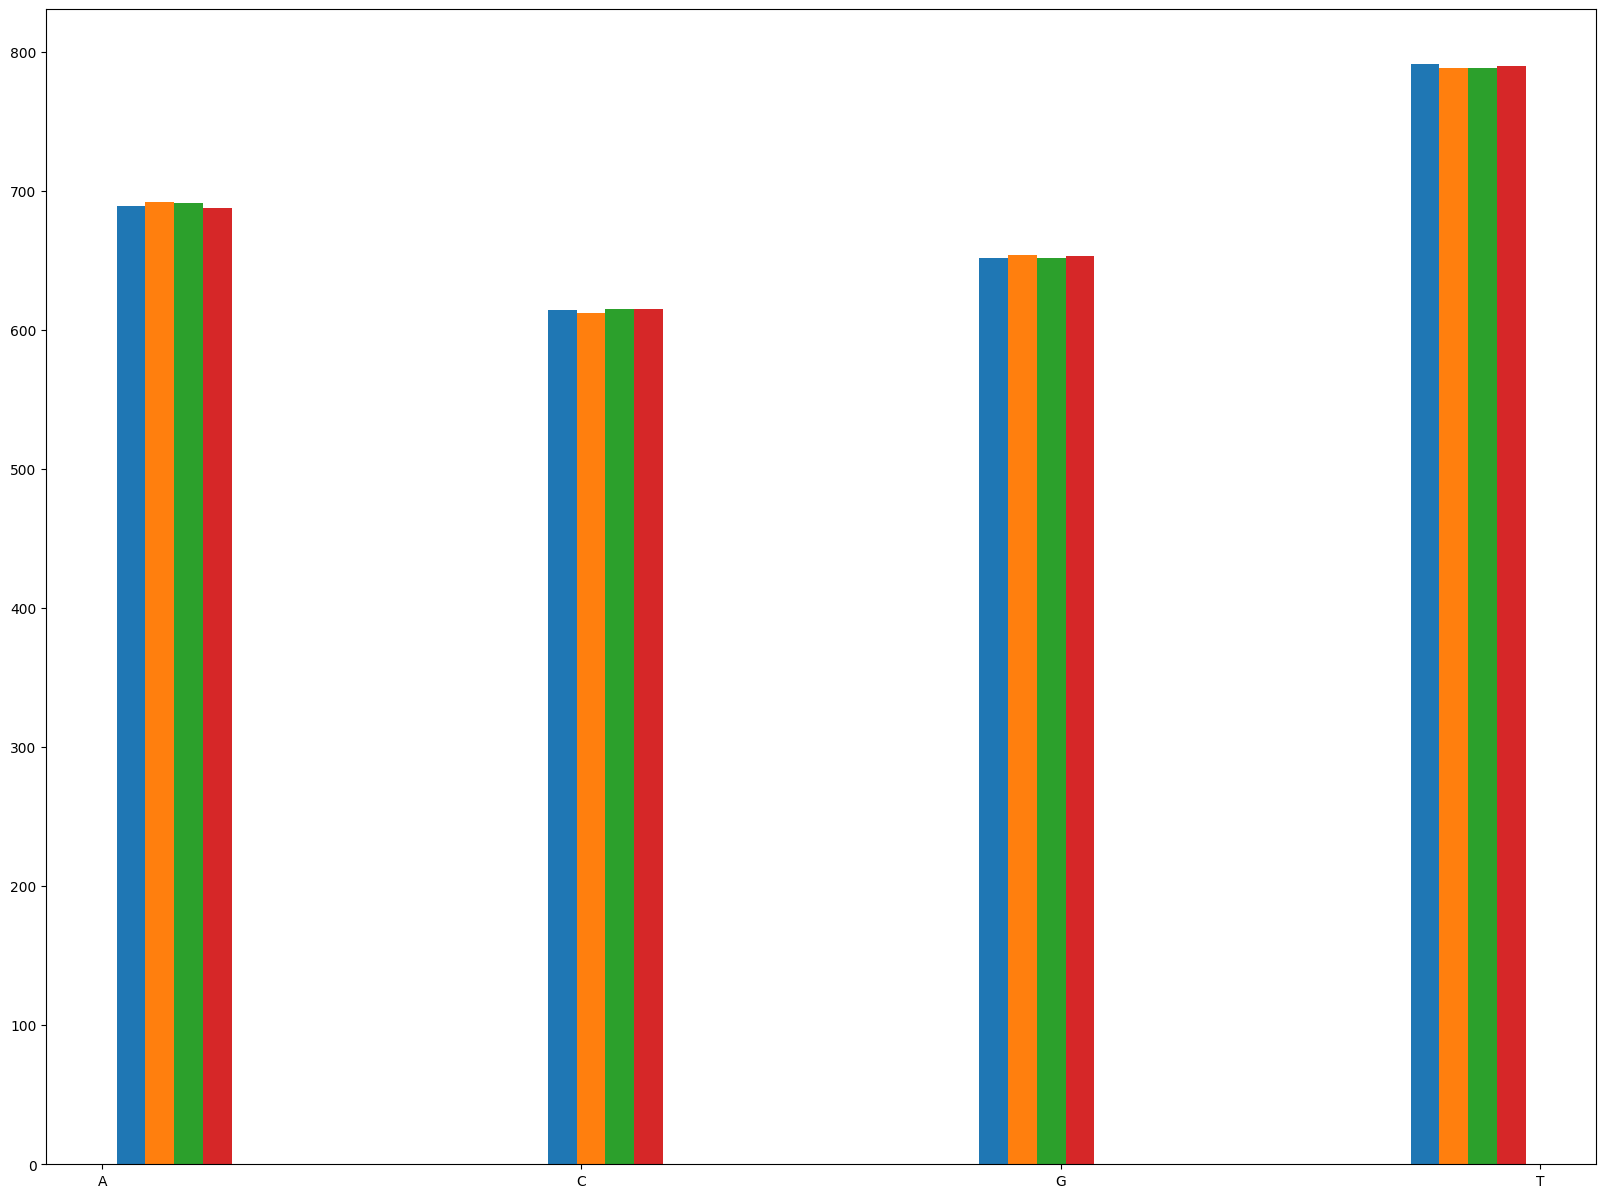

In [56]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 15)
axes.hist([fasta_to_numpy("./data/seqs/Kin2021.fasta"), fasta_to_numpy("./data/seqs/Mut2021.fasta"), fasta_to_numpy("./data/seqs/Pd2021.fasta"),
          fasta_to_numpy("./data/seqs/Kuc2021.fasta")])
plt.show()

In [42]:
2746  / 2

1373.0

In [43]:
np.isp 1373

457.6666666666667